In [1]:
import numpy as np
import pandas as pd
import re

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Tools for preprocessing input data
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [2]:
data = pd.read_csv("C:\\Users\\Taru dev\\Desktop\ML\MODULE 9 - Mini Projects\\2. Sentiment Analysis Kaggle\\sentiment_data.tsv", delimiter="\t")
data=data[:2500]
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
data['sentiment'].value_counts()
coldrop=["id"]

In [4]:
data.drop(coldrop,axis=1)
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
corpus=[]
ps=PorterStemmer()
def processing(review):
    raw_review = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', " ", review)
    raw_review = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', " ", raw_review) 
    raw_review = re.sub("[^a-zA-Z]", " ", raw_review) 
    raw_review = re.sub('\d+(\.\d+)?', " ", raw_review)
    words = raw_review.lower().split()                                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [ps.stem(w) for w in words if not w in stops]   
    # Preprocessing of text involves:
    # Remove email addresses
    # Remove URLs
    # Remove non-letters
    # Remove numbers
    # Convert to lower case, split into individual words
    # Gather the list of stopwords in English Language
    # Remove stop words and stemming the remaining words
    # Join the tokens back into one string separated by space, 
    # and return the result.
    
    return( " ".join( meaningful_words ))

In [6]:
for i in range(0,len(data.review)):
    corpus.append(processing(data["review"][i]))


In [7]:
cv=CountVectorizer()
data_in=cv.fit_transform(corpus).toarray()

In [8]:
from wordcloud import WordCloud,STOPWORDS
stop=set(STOPWORDS)

In [9]:
def make_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black', stopwords=stop,
        max_words=200,max_font_size=40,scale=3,random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))

    plt.imshow(wordcloud)
    plt.show()

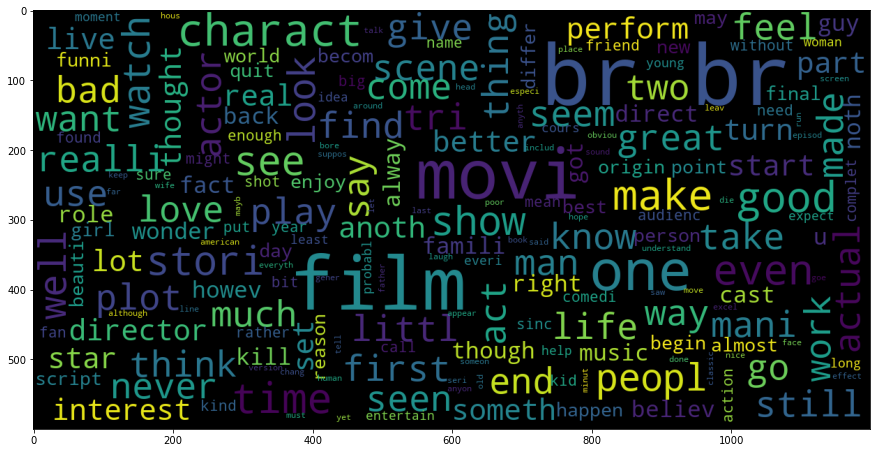

In [10]:
make_wordcloud(corpus)

In [11]:
data_out=data['sentiment']

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data_in, data_out,test_size= 0.20, random_state = 0)

In [15]:
nvb = GaussianNB()
nvb.fit(xtrain, ytrain)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(xtrain, ytrain)

dt = tree.DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [16]:
prenvb = nvb.predict(xtest)
prerf = rf.predict(xtest)
predt = dt.predict(xtest)

In [17]:
accuracy_score(ytest,prenvb)

0.648

In [19]:
accuracy_score(ytest,prerf)

0.834

In [20]:
accuracy_score(ytest,predt)

0.69

In [ ]:
# RandomForest has the best accuracy score